<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/Stock_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [74]:
#Load Data
from google.colab import files
uploaded= files.upload()

Saving NFLX.csv to NFLX (1).csv


In [98]:
df=pd.read_csv('NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [76]:
#the number of Trading days
df.shape

(4874, 7)

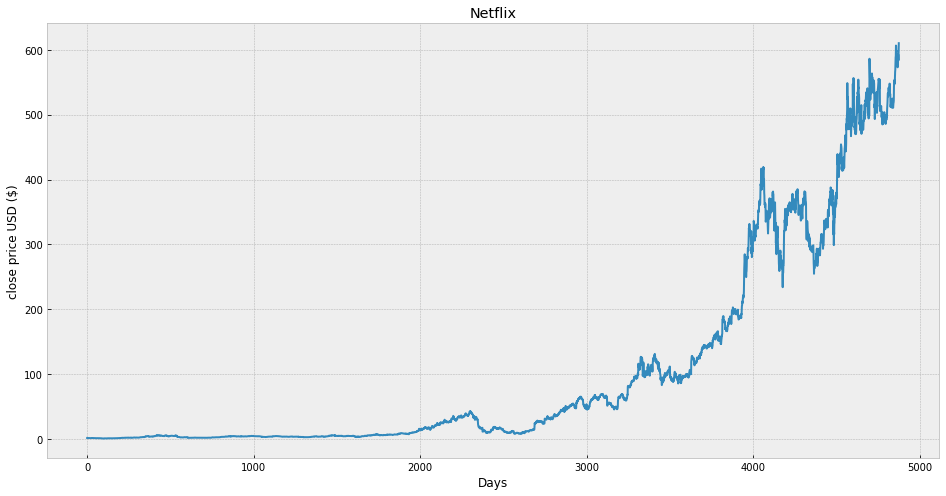

In [99]:
#visualizing the close price
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.show()

In [100]:
#Get the close price
df=df[['Close']]
df.head(5)

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429


In [101]:
#Prediction Days
future_days=25
#Creat a new column #prediction
df['Prediction']= df[['Close']].shift(-future_days)
df.head(5)


,Close,Prediction
0,1.196429,0.999286
1,1.210000,1.027857
2,1.157143,1.172857
3,1.103571,1.214286
4,1.071429,1.276429


In [102]:
#Prediction Days
future_days=25
#Creat a new column #prediction
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(5)

,Close,Prediction
4869,592.390015,NaN
4870,592.640015,NaN
4871,583.849976,NaN
4872,599.059998,NaN
4873,610.340027,NaN


In [103]:
# Creat a feature dataset into numpy
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [553.330017]
 [553.409973]
 [547.580017]]


In [104]:
#creat a target Dataset
y=np.array(df['Prediction'])[:-future_days]
print(y)

[  0.999286   1.027857   1.172857 ... 583.849976 599.059998 610.340027]


In [105]:
#split train and test dataset
x_train, x_test, y_train,y_test=train_test_split(X,y,test_size=0.25)

In [106]:
#Models
#Decision Tree regressor model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#Linear Regression model
lr=LinearRegression().fit(x_train,y_train)

In [107]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[511.769989],
       [515.409973],
       [516.48999 ],
       [518.909973],
       [519.299988],
       [514.25    ],
       [517.570007],
       [515.150024],
       [510.820007],
       [517.349976],
       [524.890015],
       [520.549988],
       [519.969971],
       [515.840027],
       [512.400024],
       [510.720001],
       [515.919983],
       [517.919983],
       [518.909973],
       [521.869995],
       [543.710022],
       [546.880005],
       [553.330017],
       [553.409973],
       [547.580017]])

In [108]:
#show the model tree prediction
tree_prediction= tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression
lr_predict=lr.predict(x_future)
print(lr_predict)

[550.119995 606.710022 566.179993 579.920013 539.450012 548.159973
 590.530029 606.710022 606.049988 597.539978 598.719971 589.289978
 577.76001  582.869995 586.5      589.349976 575.429993 573.140015
 579.920013 593.26001  592.390015 592.640015 583.849976 521.659973
 527.51001 ]

[521.8154062  525.51816873 526.6168127  529.07853296 529.47527452
 524.33818976 527.71545667 525.25373641 520.84903994 527.49163081
 535.16171229 530.74683318 530.15681267 525.95563984 522.45630737
 520.74730914 526.03697483 528.07146868 529.07853296 532.08960624
 554.30630652 557.53096197 564.09221684 564.17355183 558.24304703]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


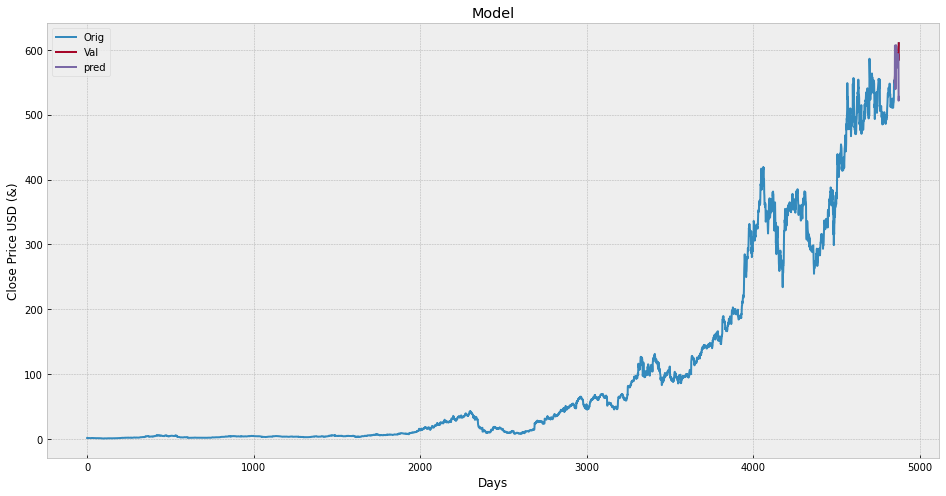

In [109]:
#visualize the data
predictions= tree_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD (&)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


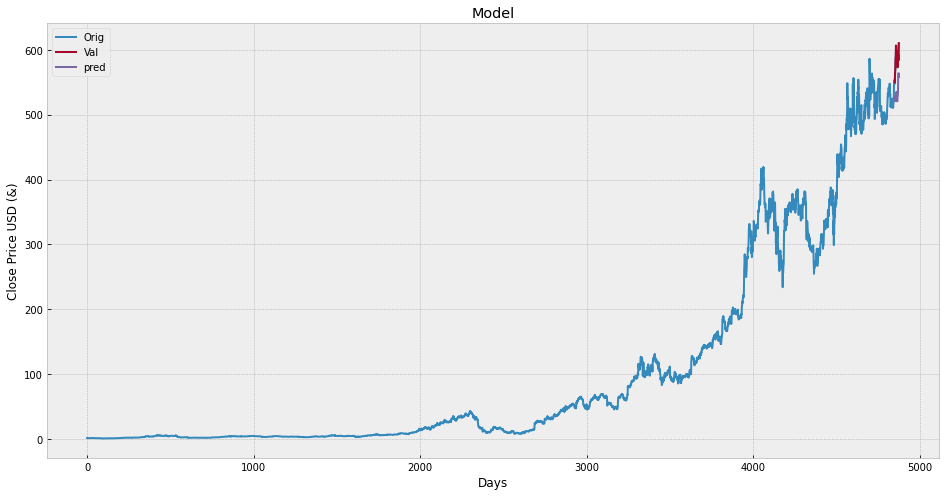

In [111]:
#visualize the data
predictions= lr_predict

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD (&)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','pred'])
plt.show()